# In this notebook I'll use gradient descent to approximate a line using a line 

In [2]:
# !pip install fastai2

In [371]:
from fastai2.vision.all import *

In [372]:
torch.manual_seed(100)

* We will take 100 random numer between -1 and 1 as an indipendent variable and generate a line using exuation y = ax+b.
* Here we took a = 2 and b = 0.05.

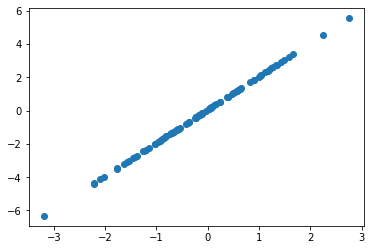

In [373]:
x = torch.randn(100)
y = 2*x+0.05
plt.scatter(x,y)

## We will construct a line with random weights and bias. And using this line we will try to approximate function y

In [374]:
def f(t, params):
    a,b = params
    return a*t+b # equation of a line

In [375]:
# Loss function
def mse(preds, targets): return ((preds-targets)**2).mean()

In [376]:
# initializing with random weithts and bias
params = torch.randn(2).requires_grad_()
orig_params = params.clone()

In [377]:
# cunstruciton of the line
preds = f(x,params)

In [378]:
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(x,y)
    ax.scatter(x, to_np(preds), color='red')

## Let's look at both the lines.
* Here green points and of function y which we will try to approximate using red points which is of funtinn f.   

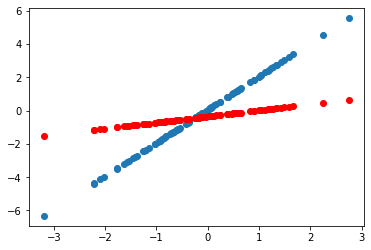

In [379]:
show_preds(preds)

**As you can see above, our line is nowhere close to it**

### Step: 3 Calculating Loss

In [380]:
loss = mse(preds, y)
loss

tensor(2.9284, grad_fn=<MeanBackward0>)

## Step 4 : Calculating Gradient

In [381]:
loss.backward()
params.grad

tensor([-3.5196, -0.2936])

### Step 5: Step the weights

**We will try different learning rate starting with very small.**

In [382]:
lr = 1e-4
params.data -= lr * params.grad.data
params.grad = None

In [383]:
preds = f(x,params)
mse(x,preds)

tensor(0.4995, grad_fn=<MeanBackward0>)

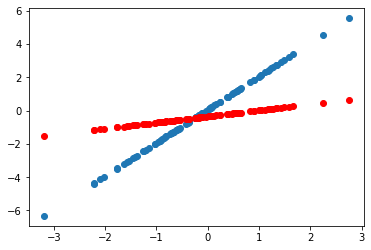

In [384]:
show_preds(preds)

In [385]:
def apply_step(params, prn=True):
    preds = f(x, params)
    loss = mse(preds, y)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds 

### Step 6: Repeat the process

In [386]:
for i in range(10): apply_step(params)

2.9271597862243652
2.925912857055664
2.9246671199798584
2.923421621322632
2.9221765995025635
2.920931339263916
2.919687509536743
2.918444871902466
2.917201519012451
2.915959119796753


**As you can see the loss decreases but with very small rate, because we choose learning rate very low. Therefore if learning rate is very low we have to take lots of iteration to find the perfect function**

In [387]:
params = orig_params.detach().requires_grad_()

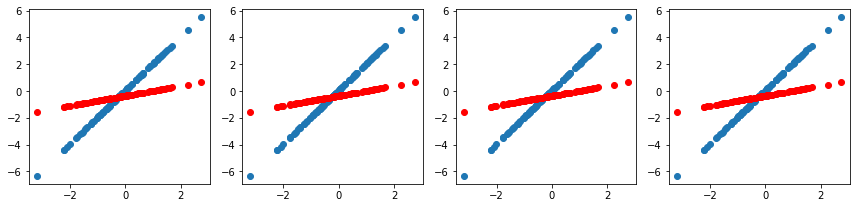

In [388]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

## Lets take learning rate different and larger then previous lr rate

In [389]:
params = torch.randn(2).requires_grad_()
orig_params = params.clone()
params

tensor([-0.3377, -0.1462], requires_grad=True)

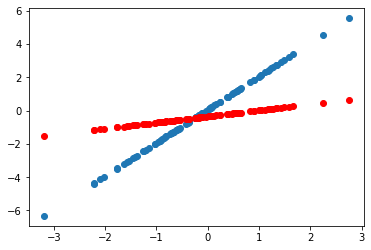

In [390]:
show_preds(preds)

In [391]:
lr = 1
for i in range(10): apply_step(params)

6.009063720703125
9.777071952819824
18.988536834716797
39.32658386230469
83.07776641845703
176.51980590820312
375.6837158203125
799.9393920898438
1703.532958984375
3627.944091796875


**As you can see above, if learning rate is very high then the loss starts increasing.**

In [392]:
params = orig_params.detach().requires_grad_()

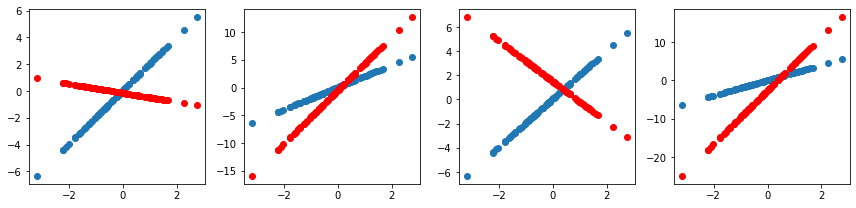

In [393]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

## Learning rate not very high and not very low

In [366]:
params = torch.randn(2).requires_grad_()
orig_params = params.clone()
params

tensor([1.1050, 0.7914], requires_grad=True)

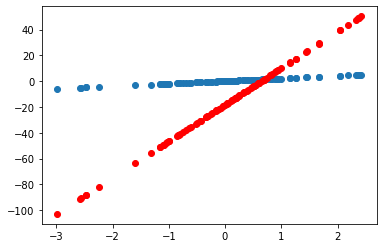

In [367]:
show_preds(preds)

In [368]:
lr = 1e-1
for i in range(10): apply_step(params)

1.4100054502487183
0.8762678503990173
0.5472781658172607
0.34338611364364624
0.21637290716171265
0.13687004148960114
0.08688436448574066
0.055328644812107086
0.03533356264233589
0.02262132428586483


In [369]:
params = orig_params.detach().requires_grad_()

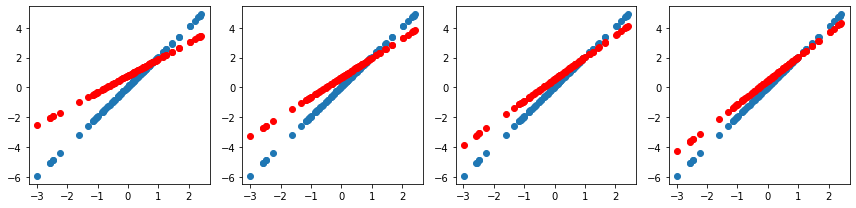

In [370]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()